In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
data = pd.read_csv("C:/Users/Windows10/Downloads/t20-world-cup-22.csv")
data

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran,5-10
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25
5,Blundstone Arena,Zimbabwe,South Africa,Super 12,Zimbabwe,Bat,79.0,5.0,51.0,0.0,NaN,NaN,NaN,Quinton de Kock,47.0,Lungi Ngidi,2-20
6,Optus Stadium,Sri lanka,Australia,Super 12,Australia,Field,157.0,6.0,158.0,3.0,Australia,Wickets,Marcus Stoinis,Marcus Stoinis,59.0,Glenn Maxwell,1-5
7,MCG,Ireland,England,Super 12,England,Field,157.0,10.0,105.0,5.0,Ireland,Runs,Andrew Balbirnie,Andrew Balbirnie,62.0,Liam Livingstone,3-17
8,MCG,New Zealand,Afghanistan,Super 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SCG,South Africa,Bangladesh,Super 12,South Africa,Bat,205.0,5.0,101.0,10.0,South Africa,Runs,Rilee Rossouw,Rilee Rossouw,109.0,Anrich Nortje,4-10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   venue                   33 non-null     object 
 1   team1                   33 non-null     object 
 2   team2                   33 non-null     object 
 3   stage                   33 non-null     object 
 4   toss winner             30 non-null     object 
 5   toss decision           30 non-null     object 
 6   first innings score     30 non-null     float64
 7   first innings wickets   30 non-null     float64
 8   second innings score    30 non-null     float64
 9   second innings wickets  30 non-null     float64
 10  winner                  29 non-null     object 
 11  won by                  29 non-null     object 
 12  player of the match     29 non-null     object 
 13  top scorer              30 non-null     object 
 14  highest score           30 non-null     floa

In [4]:
data.isnull().sum()

venue                     0
team1                     0
team2                     0
stage                     0
toss winner               3
toss decision             3
first innings score       3
first innings wickets     3
second innings score      3
second innings wickets    3
winner                    4
won by                    4
player of the match       4
top scorer                3
highest score             3
best bowler               3
best bowling figure       3
dtype: int64

In [5]:
null_rows =data[data.isnull().any(axis=1)]
null_rows

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
5,Blundstone Arena,Zimbabwe,South Africa,Super 12,Zimbabwe,Bat,79.0,5.0,51.0,0.0,NaN,NaN,NaN,Quinton de Kock,47.0,Lungi Ngidi,2-20
8,MCG,New Zealand,Afghanistan,Super 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,MCG,Afghanistan,Ireland,Super 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,MCG,Australia,England,Super 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### In this data there are some rows which has no values, so we have to remove these rows. 

In [6]:
df = data.drop([8,12,13])
df

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran,5-10
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25
5,Blundstone Arena,Zimbabwe,South Africa,Super 12,Zimbabwe,Bat,79.0,5.0,51.0,0.0,NaN,NaN,NaN,Quinton de Kock,47.0,Lungi Ngidi,2-20
6,Optus Stadium,Sri lanka,Australia,Super 12,Australia,Field,157.0,6.0,158.0,3.0,Australia,Wickets,Marcus Stoinis,Marcus Stoinis,59.0,Glenn Maxwell,1-5
7,MCG,Ireland,England,Super 12,England,Field,157.0,10.0,105.0,5.0,Ireland,Runs,Andrew Balbirnie,Andrew Balbirnie,62.0,Liam Livingstone,3-17
9,SCG,South Africa,Bangladesh,Super 12,South Africa,Bat,205.0,5.0,101.0,10.0,South Africa,Runs,Rilee Rossouw,Rilee Rossouw,109.0,Anrich Nortje,4-10
10,SCG,India,Netherlands,Super 12,India,Bat,179.0,2.0,123.0,9.0,India,Runs,Suryakumar Yadav,Virat Kohli,62.0,Bhuvneshwar Kumar,2-19


### Now the rows removed and there is one row which not enterd the values. Now we will fill the rows using conditions.

In [7]:
df.columns

Index(['venue', 'team1', 'team2', 'stage', 'toss winner', 'toss decision',
       'first innings score', 'first innings wickets', 'second innings score',
       'second innings wickets', 'winner', 'won by', 'player of the match',
       'top scorer', 'highest score', 'best bowler', 'best bowling figure'],
      dtype='object')

In [8]:
condition_1 = df['toss decision']== 'Bat' 
condition_2 = df['first innings score'] > df['second innings score']


In [9]:
df.loc[(condition_1 & condition_2),'winner']=df.loc[(condition_1 & condition_2),'winner'].fillna(df['toss winner'])
df

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran,5-10
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25
5,Blundstone Arena,Zimbabwe,South Africa,Super 12,Zimbabwe,Bat,79.0,5.0,51.0,0.0,Zimbabwe,NaN,NaN,Quinton de Kock,47.0,Lungi Ngidi,2-20
6,Optus Stadium,Sri lanka,Australia,Super 12,Australia,Field,157.0,6.0,158.0,3.0,Australia,Wickets,Marcus Stoinis,Marcus Stoinis,59.0,Glenn Maxwell,1-5
7,MCG,Ireland,England,Super 12,England,Field,157.0,10.0,105.0,5.0,Ireland,Runs,Andrew Balbirnie,Andrew Balbirnie,62.0,Liam Livingstone,3-17
9,SCG,South Africa,Bangladesh,Super 12,South Africa,Bat,205.0,5.0,101.0,10.0,South Africa,Runs,Rilee Rossouw,Rilee Rossouw,109.0,Anrich Nortje,4-10
10,SCG,India,Netherlands,Super 12,India,Bat,179.0,2.0,123.0,9.0,India,Runs,Suryakumar Yadav,Virat Kohli,62.0,Bhuvneshwar Kumar,2-19


In [10]:
df.loc[(condition_1 & condition_2),'won by']=df.loc[(condition_1 & condition_2),'won by'].fillna('Runs')
df

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran,5-10
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25
5,Blundstone Arena,Zimbabwe,South Africa,Super 12,Zimbabwe,Bat,79.0,5.0,51.0,0.0,Zimbabwe,Runs,NaN,Quinton de Kock,47.0,Lungi Ngidi,2-20
6,Optus Stadium,Sri lanka,Australia,Super 12,Australia,Field,157.0,6.0,158.0,3.0,Australia,Wickets,Marcus Stoinis,Marcus Stoinis,59.0,Glenn Maxwell,1-5
7,MCG,Ireland,England,Super 12,England,Field,157.0,10.0,105.0,5.0,Ireland,Runs,Andrew Balbirnie,Andrew Balbirnie,62.0,Liam Livingstone,3-17
9,SCG,South Africa,Bangladesh,Super 12,South Africa,Bat,205.0,5.0,101.0,10.0,South Africa,Runs,Rilee Rossouw,Rilee Rossouw,109.0,Anrich Nortje,4-10
10,SCG,India,Netherlands,Super 12,India,Bat,179.0,2.0,123.0,9.0,India,Runs,Suryakumar Yadav,Virat Kohli,62.0,Bhuvneshwar Kumar,2-19


In [11]:
df['player of the match'] = df['player of the match'].fillna(df['top scorer'])
df

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran,5-10
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25
5,Blundstone Arena,Zimbabwe,South Africa,Super 12,Zimbabwe,Bat,79.0,5.0,51.0,0.0,Zimbabwe,Runs,Quinton de Kock,Quinton de Kock,47.0,Lungi Ngidi,2-20
6,Optus Stadium,Sri lanka,Australia,Super 12,Australia,Field,157.0,6.0,158.0,3.0,Australia,Wickets,Marcus Stoinis,Marcus Stoinis,59.0,Glenn Maxwell,1-5
7,MCG,Ireland,England,Super 12,England,Field,157.0,10.0,105.0,5.0,Ireland,Runs,Andrew Balbirnie,Andrew Balbirnie,62.0,Liam Livingstone,3-17
9,SCG,South Africa,Bangladesh,Super 12,South Africa,Bat,205.0,5.0,101.0,10.0,South Africa,Runs,Rilee Rossouw,Rilee Rossouw,109.0,Anrich Nortje,4-10
10,SCG,India,Netherlands,Super 12,India,Bat,179.0,2.0,123.0,9.0,India,Runs,Suryakumar Yadav,Virat Kohli,62.0,Bhuvneshwar Kumar,2-19


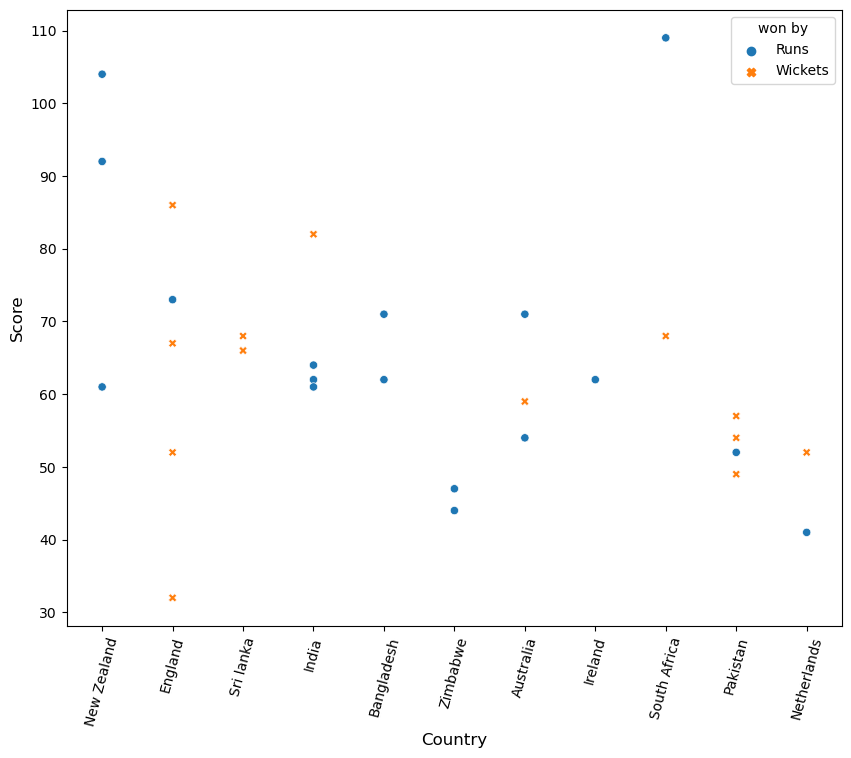

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(df, x= 'winner', y= 'highest score',hue='won by',style = 'won by')
plt.xlabel("Country",fontsize=12)
plt.ylabel("Score",fontsize=12)
plt.xticks(rotation = 75)
plt.show()

In [13]:
df.sort_values(by = ['highest score'],ascending =False).head(10)

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
9,SCG,South Africa,Bangladesh,Super 12,South Africa,Bat,205.0,5.0,101.0,10.0,South Africa,Runs,Rilee Rossouw,Rilee Rossouw,109.0,Anrich Nortje,4-10
14,SCG,New Zealand,Sri lanka,Super 12,New Zealand,Bat,167.0,7.0,102.0,10.0,New Zealand,Runs,Glenn Phillips,Glenn Phillips,104.0,Trent Boult,4-13
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
31,Adelaide Oval,India,England,Semi-final,England,Field,168.0,6.0,170.0,0.0,England,Wickets,Alex Hales,Alex Hales,86.0,Chris Jordan,3-43
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
20,The Gabba,England,New Zealand,Super 12,England,Bat,179.0,6.0,159.0,6.0,England,Runs,Jos Buttler,Jos Buttler,73.0,Sam Curran,2-26
15,The Gabba,Bangladesh,Zimbabwe,Super 12,Bangladesh,Bat,150.0,7.0,147.0,8.0,Bangladesh,Runs,Taskin Ahmed,Najmul Hossain,71.0,Taskin Ahmed,3-19
18,The Gabba,Australia,Ireland,Super 12,Ireland,Field,179.0,5.0,137.0,10.0,Australia,Runs,Aaron Finch,Lorcan Tucker,71.0,Barry McCarthy,3-29
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
17,Optus Stadium,India,South Africa,Super 12,India,Bat,133.0,9.0,137.0,5.0,South Africa,Wickets,Lungi Ngidi,Suryakumar Yadav,68.0,Lungi Ngidi,4-29


## The highest scored team in the cricket match is South Africa.

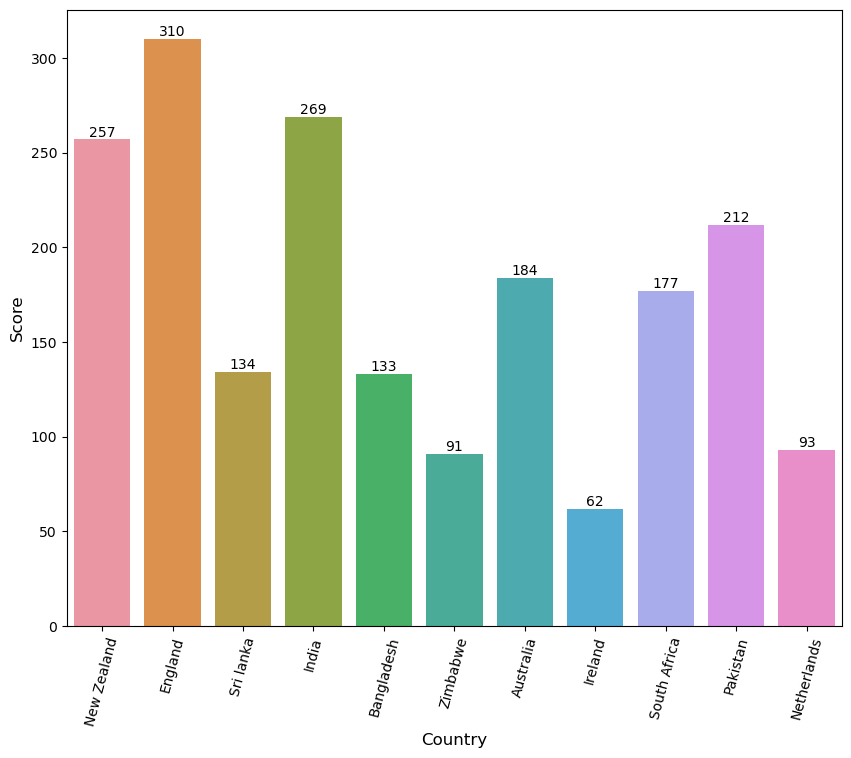

In [14]:
plt.figure(figsize=(10,8))
cr=sns.barplot(df, x= 'winner', y= 'highest score',estimator='sum',errorbar= None)
cr.bar_label(cr.containers[0], fontsize=10)
plt.xlabel("Country",fontsize=12)
plt.ylabel("Score",fontsize=12)
plt.xticks(rotation = 75)
plt.show()

## In most number of matches the highest scored team is England.

In [15]:
x= df['winner'].value_counts()
x

England         5
India           4
Pakistan        4
New Zealand     3
Australia       3
Sri lanka       2
Bangladesh      2
Zimbabwe        2
South Africa    2
Netherlands     2
Ireland         1
Name: winner, dtype: int64

In [16]:
y = df['winner'].unique()
y

array(['New Zealand', 'England', 'Sri lanka', 'India', 'Bangladesh',
       'Zimbabwe', 'Australia', 'Ireland', 'South Africa', 'Pakistan',
       'Netherlands'], dtype=object)

In [17]:
Chart = {'Team': x.index, 'Win':x.values}

z = pd.DataFrame(Chart)
z

,Team,Win
0,England,5
1,India,4
2,Pakistan,4
3,New Zealand,3
4,Australia,3
5,Sri lanka,2
6,Bangladesh,2
7,Zimbabwe,2
8,South Africa,2
9,Netherlands,2


In [18]:
z.dtypes

Team    object
Win      int64
dtype: object

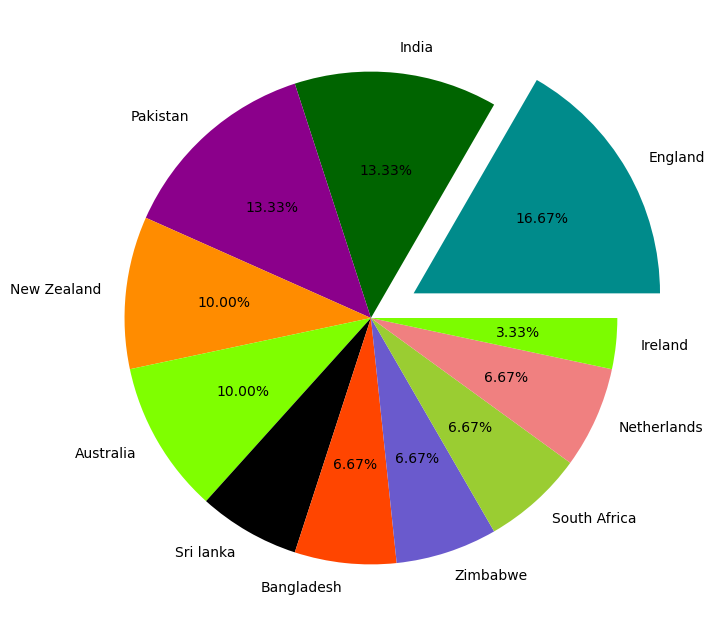

In [19]:
explodes = [0.2, 0, 0, 0,0,0,0,0,0,0,0]
Colours = ['#008B8B','#006400','#8B008B','#FF8C00','#7FFF00','#000000','#FF4500','#6A5ACD','#9ACD32','#F08080','#7CFC00']
plt.figure(figsize=(10,8))
plt.pie(z['Win'],labels=z['Team'] ,explode = explodes, autopct='%.2f%%',colors = Colours)
plt.show()

## From the graph we can understand that Team England won most number of matches.

In [22]:
df.columns

Index(['venue', 'team1', 'team2', 'stage', 'toss winner', 'toss decision',
       'first innings score', 'first innings wickets', 'second innings score',
       'second innings wickets', 'winner', 'won by', 'player of the match',
       'top scorer', 'highest score', 'best bowler', 'best bowling figure'],
      dtype='object')

In [25]:
player = df['player of the match'].value_counts()
player.head(10)

Shadab Khan          2
Virat Kohli          2
Taskin Ahmed         2
Suryakumar Yadav     2
Sam Curran           2
Wanindu Hasaranga    1
Mohammad Rizwan      1
Shaheen Afridi       1
Colin Ackermann      1
Adil Rashid          1
Name: player of the match, dtype: int64

## Take away

1. Shadab Khan ,Virat Kohli, Taskin Ahmed, Suryakumar Yadav and Sam Curran recieved player of the match 2 times.     

In [27]:
top_score = df['top scorer'].value_counts()
top_score.head(10)

Virat Kohli         3
Mohammad Rizwan     2
Colin Ackermann     2
Najmul Hossain      2
Suryakumar Yadav    2
Lorcan Tucker       1
Alex Hales          1
Pathum Nissanka     1
Glenn Maxwell       1
Kane Williamson     1
Name: top scorer, dtype: int64

## take away

1. Virat Kohli is the top scorer in 3 matches when compered to other players.

In [29]:
best_bowl = df['best bowler'].value_counts()
best_bowl.head(10)

Sam Curran             3
Shaheen Afridi         2
Taskin Ahmed           2
Lungi Ngidi            2
Anrich Nortje          2
Tim Southee            1
Wanindu Hasaranga      1
Ravichandran Ashwin    1
Brandon Glover         1
Mark Wood              1
Name: best bowler, dtype: int64

## take away

1. Sam Curran is the best bowler in 3 matches when compered to other players.